In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import LinearSVC as L_SVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('derm.csv')
sh1, sh2 = df.shape
print(sh1, sh2)
features = [i for i in df.columns if i not in ['class']]
df.head()

366 35


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


###### df.info()
df.describe(include = 'all')

In [3]:
df.drop_duplicates(inplace=True)
print(sh1, sh2, df.shape)
print(sh1 - df.shape[0])
df.isnull().sum().sort_values()

366 35 (366, 35)
0


erythema                               0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranulosis                  0
parakeratosis                          0
disappearance_granular_layer           0
spongiosis                             0
saw_tooth_appearance_retes             0
follicular_horn_plug                   0
perifollicular_parakeratosis           0
inflammatory_mononuclear_infiltrate    0
band_like_infiltrate                   0
vacuolisation_damage_basal_layer       0
age                                    0
hyperkeratosis                         0
exocytosis                             0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papul

In [4]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [5]:
df.nunique()

erythema                                4
scaling                                 4
definite_borders                        4
itching                                 4
koebner_phenomenon                      4
polygonal_papules                       4
follicular_papules                      4
oral_mucosal_involvement                4
knee_and_elbow_involvement              4
scalp_involvement                       4
family_history                          2
melanin_incontinence                    4
eosinophils_infiltrate                  3
PNL_infiltrate                          4
fibrosis_papillary_dermis               4
exocytosis                              4
acanthosis                              4
hyperkeratosis                          4
parakeratosis                           4
clubbing_rete_ridges                    4
elongation_rete_ridges                  4
thinning_suprapapillary_epidermis       4
spongiform_pustule                      4
munro_microabcess                 

In [6]:
df[df['age'].str.isnumeric() == False]

df['age'] = df['age'].replace('?', np.nan)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['age']])
df['age'] = imputer.transform(df[['age']]).ravel().astype('int64')

In [7]:
for i in range(1, 7):
    x = df[df["class"] == i]
    print(x.count())

erythema                               112
scaling                                112
definite_borders                       112
itching                                112
koebner_phenomenon                     112
polygonal_papules                      112
follicular_papules                     112
oral_mucosal_involvement               112
knee_and_elbow_involvement             112
scalp_involvement                      112
family_history                         112
melanin_incontinence                   112
eosinophils_infiltrate                 112
PNL_infiltrate                         112
fibrosis_papillary_dermis              112
exocytosis                             112
acanthosis                             112
hyperkeratosis                         112
parakeratosis                          112
clubbing_rete_ridges                   112
elongation_rete_ridges                 112
thinning_suprapapillary_epidermis      112
spongiform_pustule                     112
munro_micro

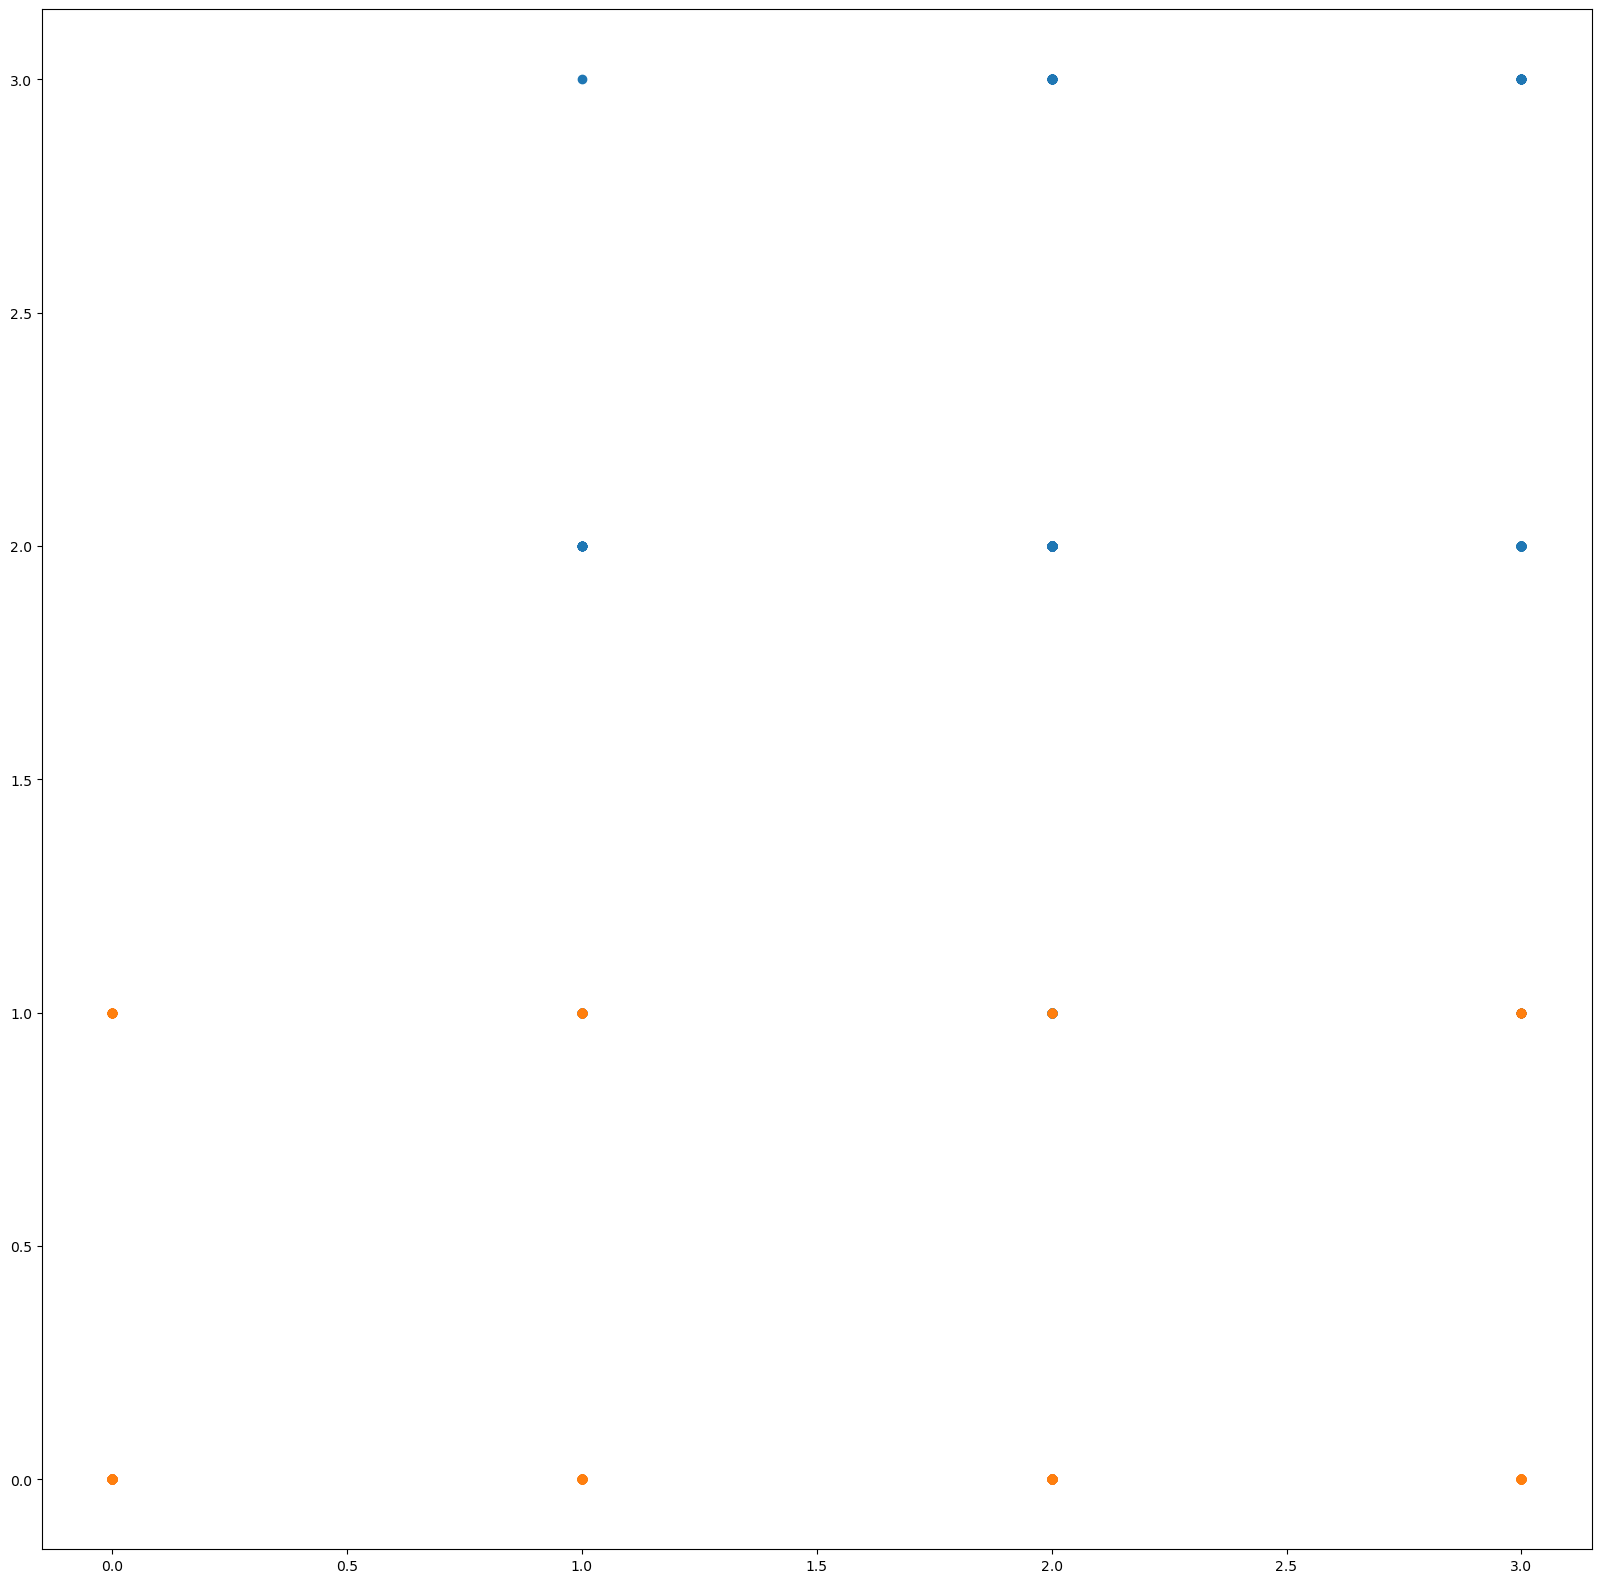

In [8]:
fig, axes = plt.subplots(figsize=(20, 20))

axes.scatter(x=df['erythema'], y=df['scaling'])
axes.scatter(x=df['itching'], y=df['family_history'])

plt.show()

['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules']
['scaling', 'definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules']
['definite_borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement']
['itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement']
['koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement']
['polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history']


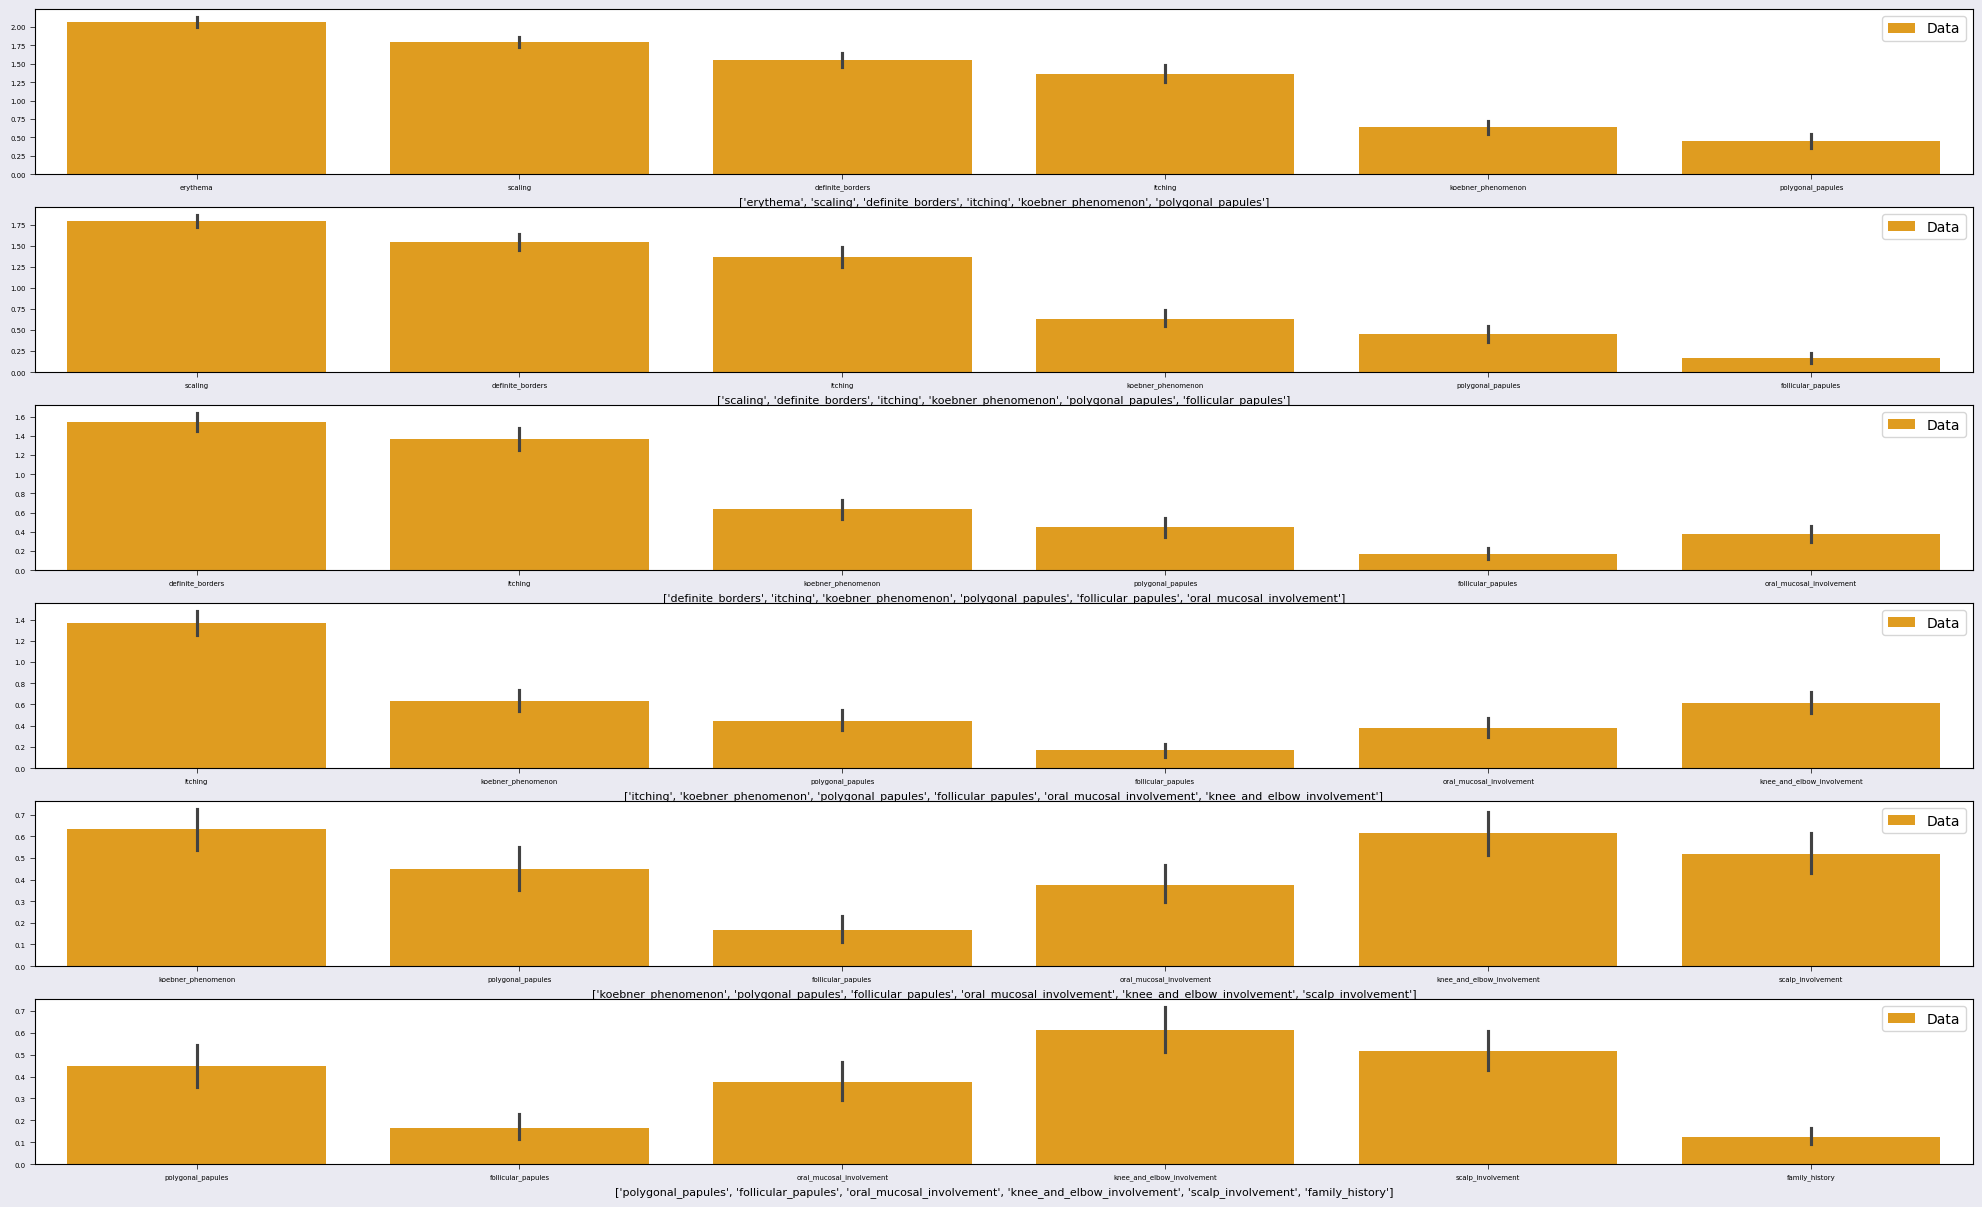

In [9]:
nrows = 6

fig, axes = plt.subplots(nrows, figsize=(25, 15), facecolor='#EAEAF2')

for r in range(nrows):
    col = features[r:r+6]
    print(col)
    df_col = df[col]
    sns.barplot(df_col, ax=axes[r], color='orange', label='Data' , fill =True)
    #sns.histplot(x=test[col], ax=axes[r, c], color='#993404', label='Test data', fill =True, kde = True)
    axes[r].legend()
    axes[r].set_ylabel('')
    axes[r].set_xlabel(col, fontsize=8)
    axes[r].tick_params(labelsize=5, width=0.5)
    axes[r].xaxis.offsetText.set_fontsize(4)
    axes[r].yaxis.offsetText.set_fontsize(4)
plt.show()

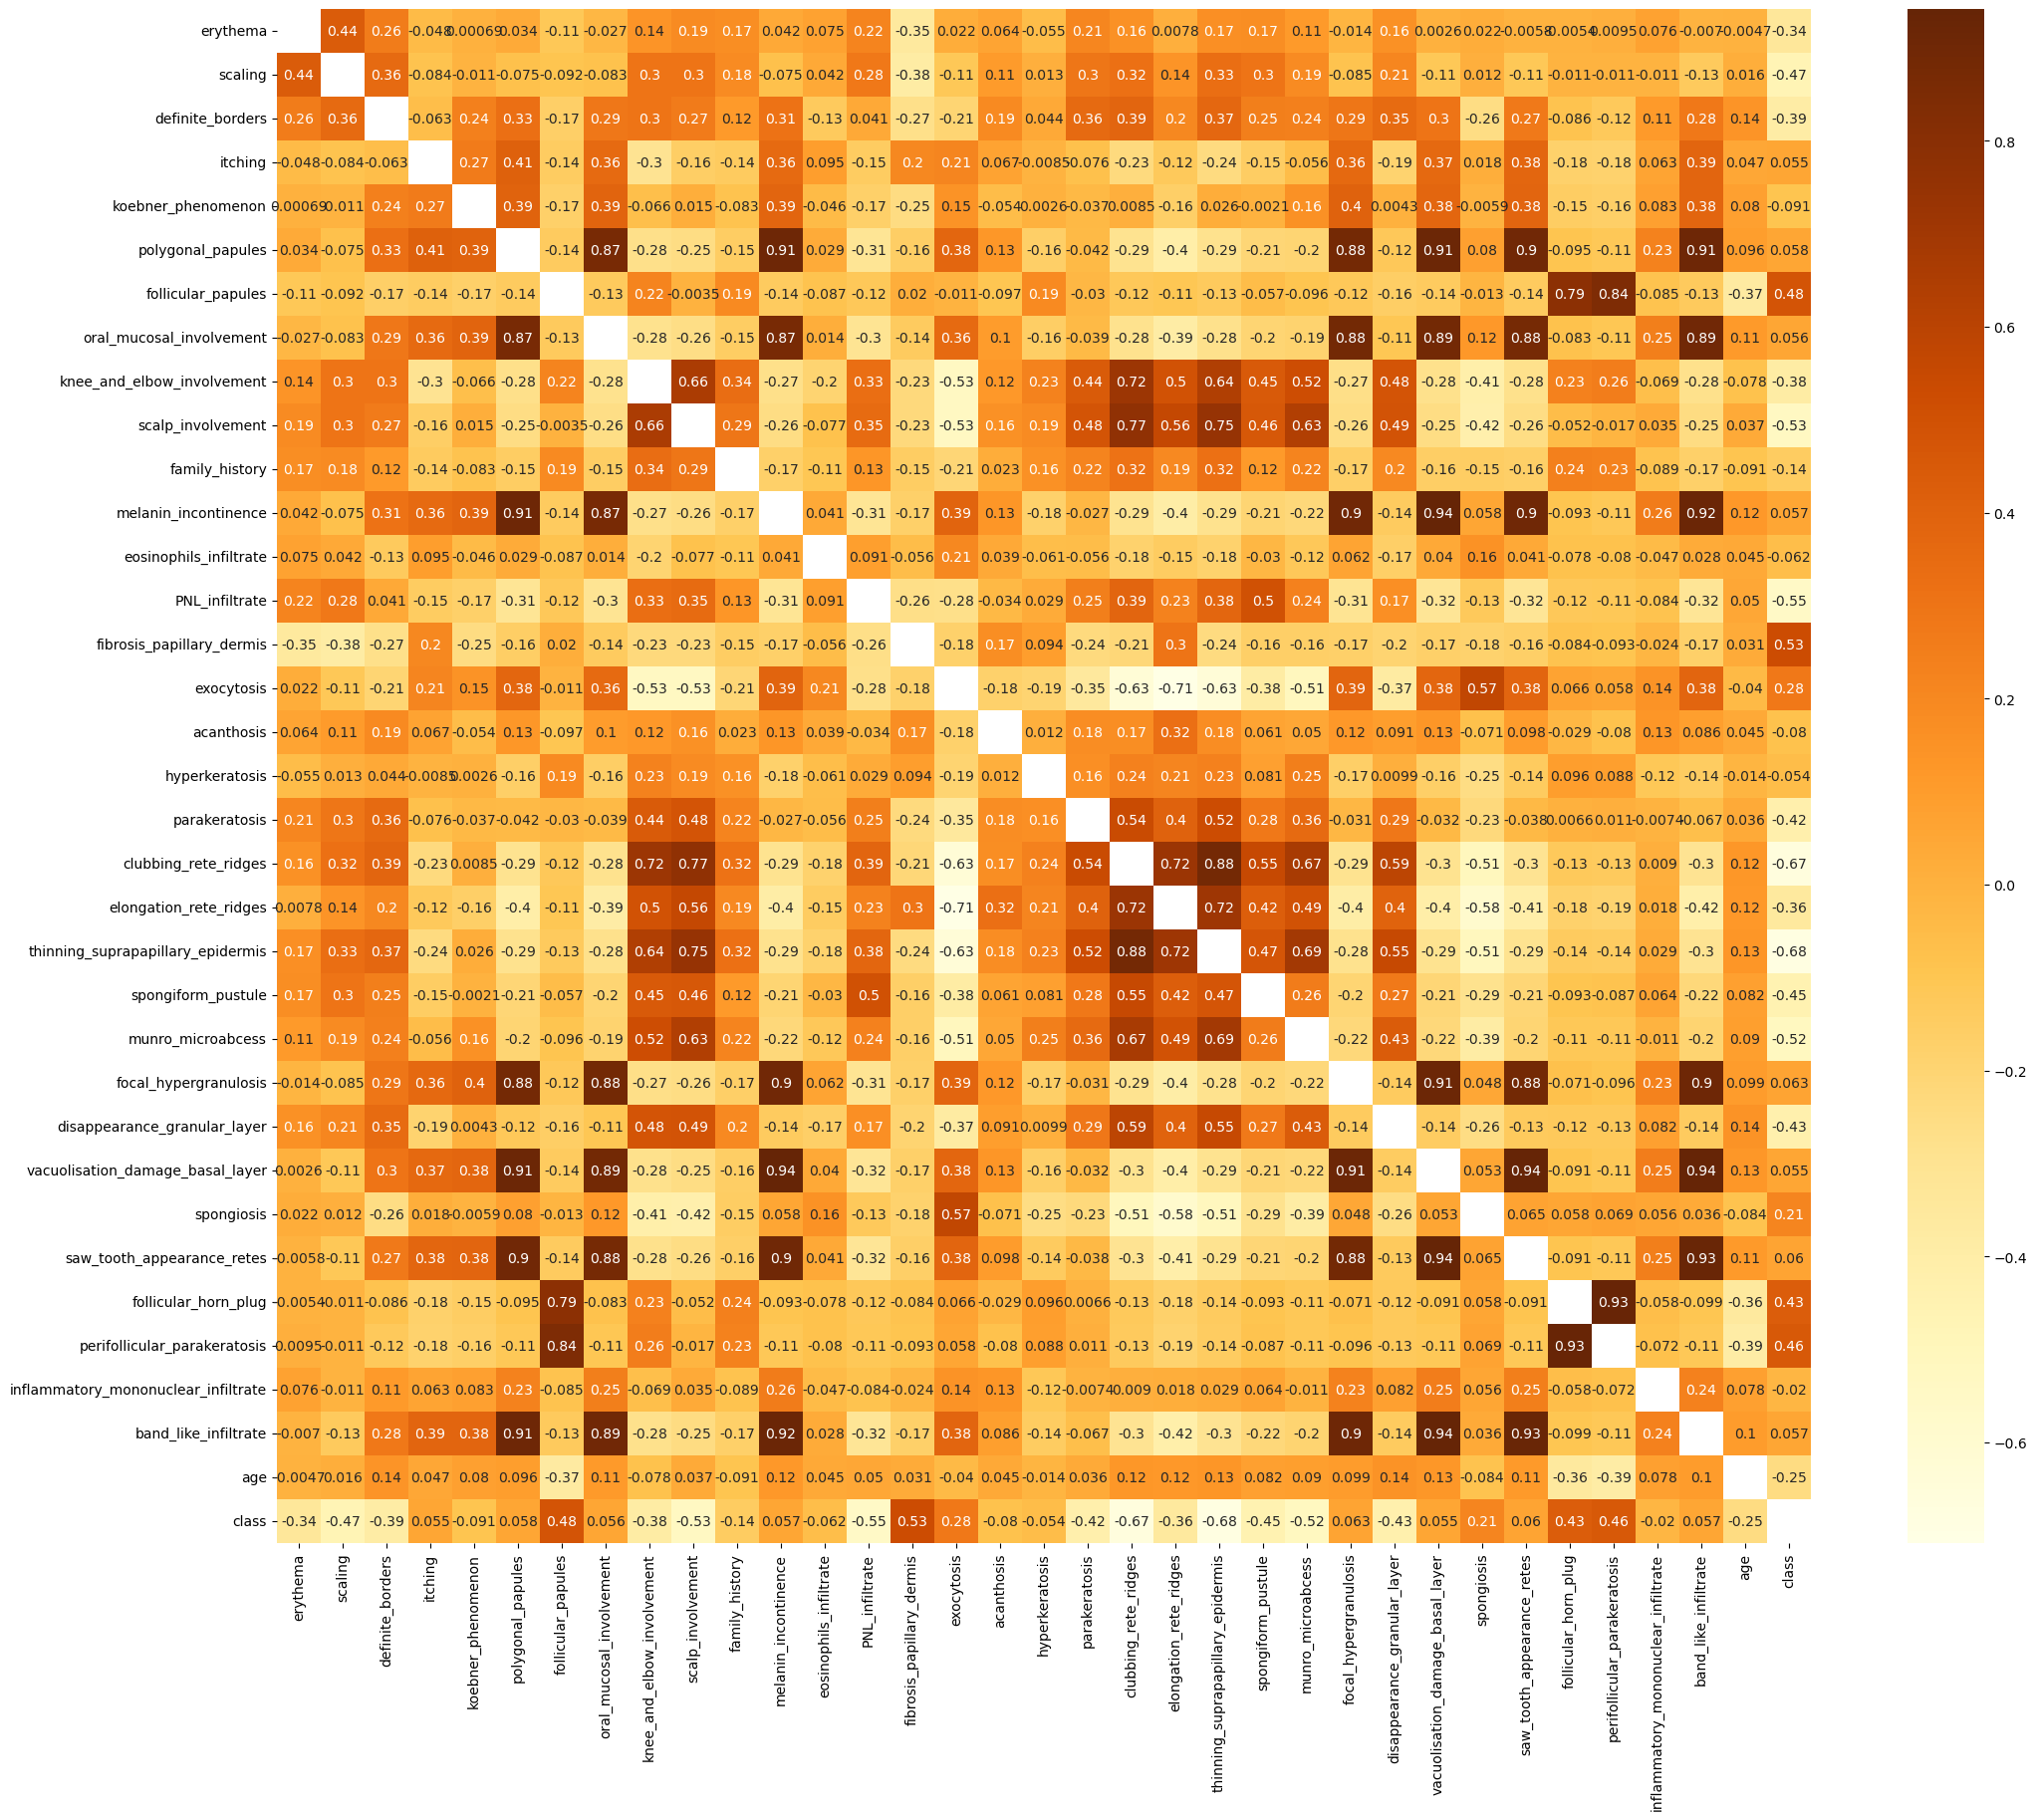

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(25,20))
np.fill_diagonal(corr_matrix.values, np.nan)
sns.heatmap(df.corr(), cmap="YlOrBr", annot=True, mask=corr_matrix.isnull(), square=True)
plt.show()

In [11]:
y = df['class']
x = df.drop(['class'], axis=1)
y = utils.to_categorical(y)
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)
print(train_x.shape)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

train_x = np.expand_dims(train_x, axis=1)
test_x = np.expand_dims(test_x, axis=1)

(274, 34)


In [18]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_transformer_classifier(
    input_shape,
    num_classes,
    head_size,
    num_heads,
    ff_dim,
    num_layers,
    dropout=0.1,
):
    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    loss = "categorical_crossentropy"
    
    return models.Model(inputs, outputs)

input_shape = (1, train_x.shape[2])
num_classes = 7

model = build_transformer_classifier(
    input_shape=input_shape,
    num_classes = num_classes,
    head_size=32,
    num_heads=4,
    ff_dim=32,
    num_layers=2,
    dropout=0.2
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.build(input_shape=(None, 1, 34))
#model.summary()

In [23]:
history = model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=100,
    batch_size=16,
    callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3),
]
)

test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/100
18/18 [==============================] - 2s 119ms/step - loss: 0.0270 - accuracy: 0.9927 - val_loss: 0.3319 - val_accuracy: 0.9348 - lr: 7.8125e-06
Epoch 2/100
18/18 [==============================] - 2s 128ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.3341 - val_accuracy: 0.9348 - lr: 7.8125e-06
Epoch 3/100
18/18 [==============================] - 2s 138ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.3367 - val_accuracy: 0.9348 - lr: 7.8125e-06
Epoch 4/100
18/18 [==============================] - 2s 127ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.3374 - val_accuracy: 0.9348 - lr: 7.8125e-06
Epoch 5/100
18/18 [==============================] - 1s 49ms/step - loss: 0.0292 - accuracy: 0.9891 - val_loss: 0.3375 - val_accuracy: 0.9348 - lr: 3.9063e-06
Epoch 6/100
18/18 [==============================] - 2s 129ms/step - loss: 0.0398 - accuracy: 0.9927 - val_loss: 0.3391 - val_accuracy: 0.9348 - lr: 3.9063e-06
Epoch 7/100
18/18 [======================

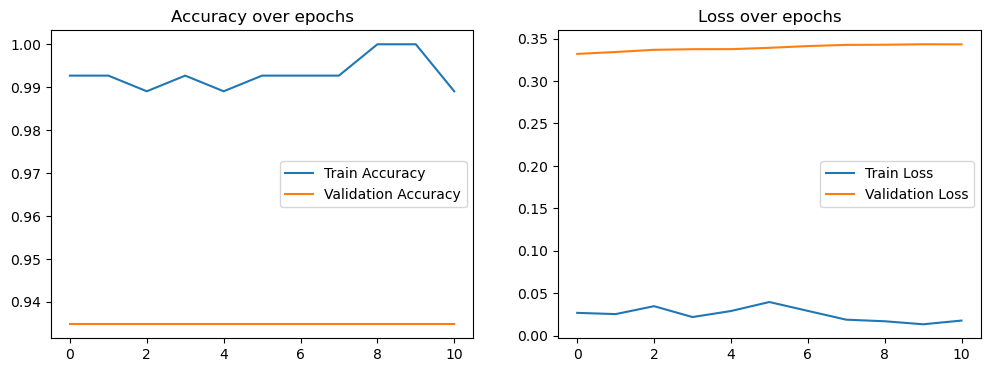

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

In [ ]:
svc = SVC(kernel="linear", C=0.01)
svc.fit(train_x, train_y)
y_lin = svc.predict(test_x)


accuracy = accuracy_score(test_y, y_lin)
recall = recall_score(test_y, y_lin, average='macro')
precision = precision_score(test_y, y_lin, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

In [ ]:
svr_poly = SVC(kernel="poly", C=10, degree=3)
svr_poly.fit(train_x, train_y)
y_poly = svr_poly.predict(test_x)

accuracy = accuracy_score(test_y, y_poly)
recall = recall_score(test_y, y_poly, average='macro')
precision = precision_score(test_y, y_poly, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

In [ ]:
svr_rbf = SVC(kernel="rbf", C=3)
svr_rbf.fit(train_x, train_y)
y_rbf = svr_rbf.predict(test_x)

accuracy = accuracy_score(test_y, y_rbf)
recall = recall_score(test_y, y_rbf, average='macro')
precision = precision_score(test_y, y_rbf, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

In [ ]:
a = []
for i in range(1, 90):
    tree_reg = DecisionTreeClassifier(max_depth=i)
    tree_reg.fit(train_x, train_y)
    
    y_dtr = tree_reg.predict(test_x)

    accuracy = accuracy_score(test_y, y_dtr)
    recall = recall_score(test_y, y_dtr, average='macro')
    precision = precision_score(test_y, y_dtr, average='weighted')
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)

In [ ]:
rfr = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=32, n_jobs=-1)
rfr.fit(train_x, train_y)
y_rfr = rfr.predict(test_x)
imp = rfr.feature_importances_

accuracy = accuracy_score(test_y, y_rfr)
recall = recall_score(test_y, y_rfr, average='macro')
precision = precision_score(test_y, y_rfr, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print(imp)

In [ ]:
rfr = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=1000, max_depth=10)
rfr.fit(train_x, train_y)
y_gbc = rfr.predict(test_x)

accuracy = accuracy_score(test_y, y_gbc)
recall = recall_score(test_y, y_gbc, average='macro')
precision = precision_score(test_y, y_gbc, average='weighted')
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)